### Обработка пропусков в числовых данных

In [ ]:
# page_id | The unique identifier for that characters page within the wikia 
# name | The name of the character 
# urlslug | The unique url within the wikia that takes you to the character 
# ID | The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity]) 
# ALIGN | If the character is Good, Bad or Neutral 
# EYE | Eye color of the character 
# HAIR | Hair color of the character 
# SEX | Sex of the character (e.g. Male, Female, etc.) 
# GSM | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters) 
# ALIVE | If the character is alive or deceased 
# APPEARANCES | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.) 
# FIRST APPEARANCE | The month and year of the character's first appearance in a comic book, if available 
# YEAR | The year of the character's first appearance in a comic book, if available

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")

In [10]:
data.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [12]:
data.shape

(16376, 13)

In [28]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [11]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [13]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16376, 13), (16376, 3))

In [21]:
data_new_1.head(5)

,page_id,name,urlslug
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker)
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers)
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett)
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark)
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson)


In [18]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16376, 13), (58, 13))

In [20]:
data_new_2.head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
28,6545,Natalia Romanova (Earth-616),\/Natalia_Romanova_(Earth-616),Public Identity,Good Characters,Green Eyes,Red Hair,Female Characters,Bisexual Characters,Living Characters,1050.0,Apr-64,1964.0
42,1818,Hercules (Earth-616),\/Hercules_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,Bisexual Characters,Living Characters,725.0,Oct-65,1965.0
45,2307,Elizabeth Braddock (Earth-616),\/Elizabeth_Braddock_(Earth-616),Secret Identity,Neutral Characters,Blue Eyes,Purple Hair,Female Characters,Bisexual Characters,Living Characters,708.0,Dec-76,1976.0
61,2042,Loki Laufeyson (Earth-616),\/Loki_Laufeyson_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Genderfluid Characters,Bisexual Characters,Living Characters,532.0,Aug-49,1949.0
71,1409,Deadpool (Wade Wilson),\/Deadpool_(Wade_Wilson),Secret Identity,Neutral Characters,Brown Eyes,Bald,Male Characters,Transvestites,Living Characters,500.0,Feb-91,1991.0


In [24]:
data_new_3 = data.fillna(0)
print(data.shape, data_new_3.shape)
data_new_3.head()

(16376, 13) (16376, 13)


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258.0,Nov-50,1950.0


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


In [29]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0: #and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [6]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [7]:
data_num = data[num_cols]
data_num.head(5)

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0


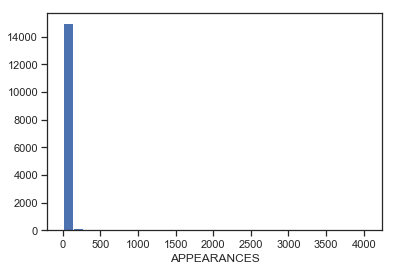

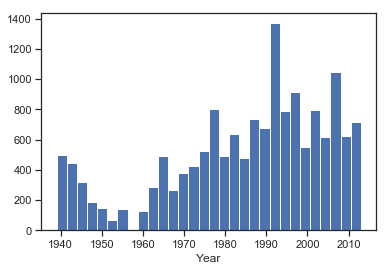

In [54]:
for col in data_num: #median надо брать для многомодального распределния
    plt.hist(data[col].dropna(axis = 0, how='any'), 30)
    plt.xlabel(col)
    plt.show()

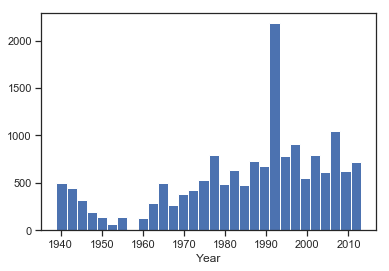

In [65]:
## after imputation
plt.hist(data['Year'], 30)
plt.xlabel('Year')
plt.show()

In [57]:
data[data['Year'].isnull()].head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
12,7823,Namor McKenzie (Earth-616),\/Namor_McKenzie_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Male Characters,NaN,Living Characters,1528.0,NaN,NaN
38,1677,Rogue (Anna Marie) (Earth-616),\/Rogue_(Anna_Marie)_(Earth-616),Secret Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,850.0,NaN,NaN
80,67048,Blaine Colt (Earth-616),\/Blaine_Colt_(Earth-616),Public Identity,NaN,Blue Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,429.0,NaN,NaN
114,37751,Monica Rambeau (Earth-616),\/Monica_Rambeau_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,327.0,NaN,NaN
259,25255,James Bradley (Earth-616),\/James_Bradley_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,158.0,NaN,NaN


In [58]:
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([   12,    38,    80,   114,   259,   310,   413,   683,   789,
              854,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=815)

In [59]:
data[data.index.isin(flt_index)].head(5)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
12,7823,Namor McKenzie (Earth-616),\/Namor_McKenzie_(Earth-616),No Dual Identity,Neutral Characters,Green Eyes,Black Hair,Male Characters,NaN,Living Characters,1528.0,NaN,NaN
38,1677,Rogue (Anna Marie) (Earth-616),\/Rogue_(Anna_Marie)_(Earth-616),Secret Identity,Good Characters,Green Eyes,Auburn Hair,Female Characters,NaN,Living Characters,850.0,NaN,NaN
80,67048,Blaine Colt (Earth-616),\/Blaine_Colt_(Earth-616),Public Identity,NaN,Blue Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,429.0,NaN,NaN
114,37751,Monica Rambeau (Earth-616),\/Monica_Rambeau_(Earth-616),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,327.0,NaN,NaN
259,25255,James Bradley (Earth-616),\/James_Bradley_(Earth-616),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,158.0,NaN,NaN


In [60]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Year']

12      NaN
38      NaN
80      NaN
114     NaN
259     NaN
310     NaN
413     NaN
683     NaN
789     NaN
854     NaN
997     NaN
1118    NaN
1158    NaN
1316    NaN
1454    NaN
1564    NaN
1565    NaN
1845    NaN
1937    NaN
2033    NaN
2147    NaN
2148    NaN
2398    NaN
2399    NaN
2549    NaN
2727    NaN
2728    NaN
2909    NaN
2910    NaN
2911    NaN
         ..
16346   NaN
16347   NaN
16348   NaN
16349   NaN
16350   NaN
16351   NaN
16352   NaN
16353   NaN
16354   NaN
16355   NaN
16356   NaN
16357   NaN
16358   NaN
16359   NaN
16360   NaN
16361   NaN
16362   NaN
16363   NaN
16364   NaN
16365   NaN
16366   NaN
16367   NaN
16368   NaN
16369   NaN
16370   NaN
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: Year, Length: 815, dtype: float64

In [8]:
data_num_Year = data_num[['Year']]
data_num_Year.head()

,Year
0,1962.0
1,1941.0
2,1974.0
3,1963.0
4,1950.0


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [9]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [10]:
strategies=['mean', 'median','most_frequent']

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    print(data_num_imp)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

[[1962.        ]
 [1941.        ]
 [1974.        ]
 ...
 [1984.95180258]
 [1984.95180258]
 [1984.95180258]]


('mean', array([1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 1984.95180258, 1984.95180258,
        1984.95180258, 1984.95180258, 19

In [23]:
strategies[1], test_num_impute(strategies[1])

[[1962.]
 [1941.]
 [1974.]
 ...
 [1990.]
 [1990.]
 [1990.]]


('median',
 array([1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
        1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 19

In [24]:
strategies[2], test_num_impute(strategies[2])

[[1962.]
 [1941.]
 [1974.]
 ...
 [1993.]
 [1993.]
 [1993.]]


('most_frequent',
 array([1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993., 1993.,
        1993., 1993., 1993., 1993., 1993., 1993., 1993., 19

In [26]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [27]:
data[['APPEARANCES']].describe()

,APPEARANCES
count,15280.000000
mean,17.033377
std,96.372959
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,4043.000000


In [28]:
test_num_impute_col(data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 1096, 17.033376963350786, 17.033376963350786)

In [29]:
test_num_impute_col(data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 1096, 3.0, 3.0)

In [30]:
test_num_impute_col(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 1096, 1.0, 1.0)

In [53]:
test_num_impute_col_inplace(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [61]:
def test_num_impute_inpl(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    print(data_num_imp)
    data['Year'] = data_num_imp
    return data[mask_missing_values_only]

In [62]:
strategies[2], test_num_impute_inpl(strategies[2])

[[1962.]
 [1941.]
 [1974.]
 ...
 [1993.]
 [1993.]
 [1993.]]


('most_frequent',
        page_id                                               name  \
 12        7823                         Namor McKenzie (Earth-616)   
 38        1677                     Rogue (Anna Marie) (Earth-616)   
 80       67048                            Blaine Colt (Earth-616)   
 114      37751                         Monica Rambeau (Earth-616)   
 259      25255                          James Bradley (Earth-616)   
 310     535259                                  Steel (Earth-616)   
 413     626857                         Howard Hanover (Earth-616)   
 683      13066                                    Fen (Earth-616)   
 789     103136                                Thakorr (Earth-616)   
 854      30883                             Brightwind (Earth-616)   
 997      18445                         Ahura Boltagon (Earth-616)   
 1118     17489                        Francesca Grace (Earth-616)   
 1158      1771                       Alistaire Smythe (Earth-616)   
 1

In [63]:
#new
data['Year'].value_counts()

1993.0    1369
1994.0     485
1992.0     455
2006.0     381
2008.0     360
1991.0     360
1990.0     357
2011.0     349
2005.0     336
1997.0     334
2010.0     324
2000.0     322
1989.0     321
2002.0     311
1976.0     308
2007.0     307
1996.0     306
1988.0     304
2009.0     302
1995.0     301
1977.0     292
1975.0     287
2004.0     282
1998.0     274
2003.0     257
1980.0     257
1985.0     254
1986.0     247
1973.0     245
1942.0     244
          ... 
1972.0     182
1965.0     180
1964.0     174
2013.0     167
1968.0     142
1966.0     140
1944.0     134
1969.0     134
1970.0     132
1967.0     124
1948.0     116
1971.0     113
1962.0     105
1945.0      97
1946.0      90
1961.0      84
1954.0      82
1947.0      72
1939.0      69
1949.0      62
1951.0      54
1955.0      43
1960.0      40
1953.0      39
1950.0      29
1952.0      26
1956.0      16
1957.0       7
1959.0       4
1958.0       2
Name: Year, Length: 75, dtype: int64

In [3]:
#old
data['Year'].value_counts()

1993.0    554
1994.0    485
1992.0    455
2006.0    381
2008.0    360
1991.0    360
1990.0    357
2011.0    349
2005.0    336
1997.0    334
2010.0    324
2000.0    322
1989.0    321
2002.0    311
1976.0    308
2007.0    307
1996.0    306
1988.0    304
2009.0    302
1995.0    301
1977.0    292
1975.0    287
2004.0    282
1998.0    274
2003.0    257
1980.0    257
1985.0    254
1986.0    247
1973.0    245
1942.0    244
         ... 
1972.0    182
1965.0    180
1964.0    174
2013.0    167
1968.0    142
1966.0    140
1944.0    134
1969.0    134
1970.0    132
1967.0    124
1948.0    116
1971.0    113
1962.0    105
1945.0     97
1946.0     90
1961.0     84
1954.0     82
1947.0     72
1939.0     69
1949.0     62
1951.0     54
1955.0     43
1960.0     40
1953.0     39
1950.0     29
1952.0     26
1956.0     16
1957.0      7
1959.0      4
1958.0      2
Name: Year, Length: 75, dtype: int64

In [64]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                    0
dtype: int64

In [66]:
#new
data[['Year']].describe()

,Year
count,16376.000000
mean,1985.352345
std,19.247732
min,1939.000000
25%,1975.000000
50%,1991.000000
75%,2000.000000
max,2013.000000


In [6]:
#old
data[['Year']].describe()

,Year
count,15561.000000
mean,1984.951803
std,19.663571
min,1939.000000
25%,1974.000000
50%,1990.000000
75%,2000.000000
max,2013.000000


In [ ]:
#сместили немного выборку изза того что взяли моду а не медиану

### Обработка пропусков в категориальных данных

In [10]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


In [17]:
# где меньше пропусков, то и достовернее брать для модели
cat_temp_data = data[['ALIGN']]
cat_temp_data.head()

,ALIGN
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters


In [18]:
cat_temp_data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [16]:
data['ALIGN'].value_counts()

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

In [21]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Good Characters'],
       ['Good Characters'],
       ['Neutral Characters'],
       ...,
       ['Bad Characters'],
       ['Neutral Characters'],
       ['Bad Characters']], dtype=object)

In [25]:
np.unique(data_imp2)

array(['Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

In [27]:
cat_enc = pd.DataFrame({'ALIGN_filled':data_imp2.T[0]})
cat_enc

,ALIGN_filled
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters
5,Good Characters
6,Good Characters
7,Good Characters
8,Neutral Characters
9,Good Characters


In [29]:
cat_enc.isnull().sum()

ALIGN_filled    0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [34]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['ALIGN_filled'])

In [37]:
cat_enc['ALIGN_filled'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters'],
      dtype=object)

In [38]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [39]:
le.inverse_transform([0, 1, 2])

array(['Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

In [40]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['ALIGN_filled']])

In [43]:
cat_enc.shape

(16376, 1)

In [42]:
cat_enc_ohe.shape

(16376, 3)

In [47]:
cat_enc_ohe

<16376x3 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [48]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])

In [49]:
pd.get_dummies(cat_enc).head() # one hot encoding лучше использовать чем label в моделях(knn)! но для дерева. Целевой признак всегда label encoding/

,ALIGN_filled_Bad Characters,ALIGN_filled_Good Characters,ALIGN_filled_Neutral Characters
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [50]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters,ALIGN_nan
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [17]:
sc1 = MinMaxScaler()
tmp = data[['Year']].dropna(axis = 0, how='any')
sc1_data = sc1.fit_transform(tmp)

In [18]:
sc1_data

array([[0.31081081],
       [0.02702703],
       [0.47297297],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

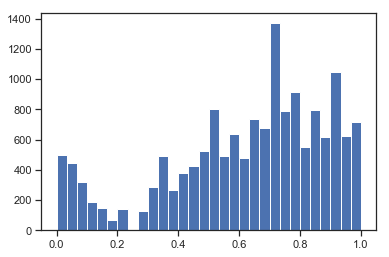

In [19]:
plt.hist(sc1_data, 30) #год нехорошо подавать, надо делать мин макс
plt.show()

In [24]:
np.describe(sc1_data)

AttributeError: module 'numpy' has no attribute 'describe'

ValueError: max must be larger than min in range parameter.

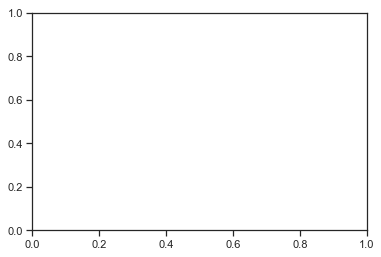

In [12]:
plt.hist(sc1_data, 30) #сравнить виды импютаций на кроссвалидации
plt.show()